In [57]:
import numpy as np
import pandas as pd


In [58]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [59]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [61]:
df.duplicated().sum()

0

In [62]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [63]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [64]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [65]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [66]:
df['Gender'].value_counts()


Male      5457
Female    4543
Name: Gender, dtype: int64

In [67]:
#one-hot encoding
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [68]:
X = df.drop(columns=['Exited'])
Y = df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [69]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [70]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [71]:
X_train.shape

(8000, 11)

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
X_train_scaled

array([[-0.9072059 ,  0.0112057 ,  0.33980608, ...,  1.71773609,
        -0.56676462, -1.09582175],
       [-1.4160772 , -0.7476989 , -0.00526229, ..., -0.5821616 ,
         1.7644009 , -1.09582175],
       [ 0.05861107, -0.17852045,  1.37501118, ...,  1.71773609,
        -0.56676462,  0.91255717],
       ...,
       [-0.15947663,  1.33928875, -0.69539903, ...,  1.71773609,
        -0.56676462, -1.09582175],
       [ 0.03784081, -0.17852045, -0.69539903, ...,  1.71773609,
        -0.56676462, -1.09582175],
       [ 0.37016493, -1.5066035 ,  1.02994281, ..., -0.5821616 ,
        -0.56676462,  0.91255717]])

In [74]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [75]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [76]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 11)                132       
                                                                 
 dense_7 (Dense)             (None, 11)                132       
                                                                 
 dense_8 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train_scaled,Y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 0.6367 - accuracy: 0.6422 - val_loss: 0.4914 - val_accuracy: 0.7950
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4517 - accuracy: 0.8041 - val_loss: 0.4415 - val_accuracy: 0.8069
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4255 - accuracy: 0.8175 - val_loss: 0.4265 - val_accuracy: 0.8144
Epoch 4/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4142 - accuracy: 0.8220 - val_loss: 0.4146 - val_accuracy: 0.8263
Epoch 5/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4069 - accuracy: 0.8250 - val_loss: 0.4083 - val_accuracy: 0.8313
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4002 - accuracy: 0.8275 - val_loss: 0.4006 - val_accuracy: 0.8325
Epoch 7/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3943 - accuracy: 0.8280 - val_loss: 0.3948 - val_accuracy: 0.8338

In [78]:
model.layers[0].get_weights()

[array([[ 0.56187564, -0.39166743, -0.01250836, -0.03615652, -0.39388987,
          0.17771429,  0.22685528,  0.34202924,  0.09318096,  0.05944428,
         -0.13841917],
        [-0.3940946 , -1.039977  ,  0.6370357 , -0.41521323, -0.2072801 ,
         -0.07224016, -0.04985949,  0.18010274, -0.6691063 , -0.70216364,
         -0.02029781],
        [ 0.07469076,  0.21594605,  0.05369294, -0.05588793, -0.11720032,
         -0.08967662,  0.13499847,  0.08307639,  0.05369029, -0.10336562,
         -0.2310732 ],
        [ 0.23874652, -0.1487511 , -0.03224868, -0.6937675 , -0.34089202,
         -0.36097518, -0.7097175 ,  0.2961944 ,  0.02359981, -0.04946874,
         -0.6794385 ],
        [-0.19017065, -0.18281513, -0.26349187,  0.23483434, -0.02799137,
          1.6581659 ,  0.10528745, -0.564199  ,  0.24770142, -0.05120347,
         -0.7796706 ],
        [ 0.29665527,  0.17827405,  0.2225437 ,  0.02247704,  0.15783708,
          0.02708875, -0.15188408,  0.07267868,  0.00171227, -0.0071391

In [79]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 893us/step


In [80]:
y_pred = np.where(y_log>0.5,1,0)

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.8615

In [84]:
history.history

{'loss': [0.6367011070251465,
  0.45174771547317505,
  0.4254930019378662,
  0.4142495095729828,
  0.4068739414215088,
  0.40019088983535767,
  0.3943479657173157,
  0.3881567716598511,
  0.3833082318305969,
  0.37689006328582764,
  0.36886417865753174,
  0.3609243333339691,
  0.3552517592906952,
  0.3525349497795105,
  0.3495972156524658,
  0.3477201461791992,
  0.34614303708076477,
  0.34496405720710754,
  0.343557745218277,
  0.3428117036819458,
  0.3417447805404663,
  0.3406648337841034,
  0.33986809849739075,
  0.3395594656467438,
  0.33822888135910034,
  0.3381462097167969,
  0.3370853066444397,
  0.3361690640449524,
  0.3357542157173157,
  0.3353941738605499,
  0.3347432613372803,
  0.33439284563064575,
  0.33264172077178955,
  0.33284392952919006,
  0.3321820795536041,
  0.331849068403244,
  0.3302035927772522,
  0.3307395875453949,
  0.3306225538253784,
  0.33024656772613525,
  0.3299311697483063,
  0.3298979103565216,
  0.3290978670120239,
  0.329037070274353,
  0.32834750413

In [83]:
import matplotlib.pyplot as plt

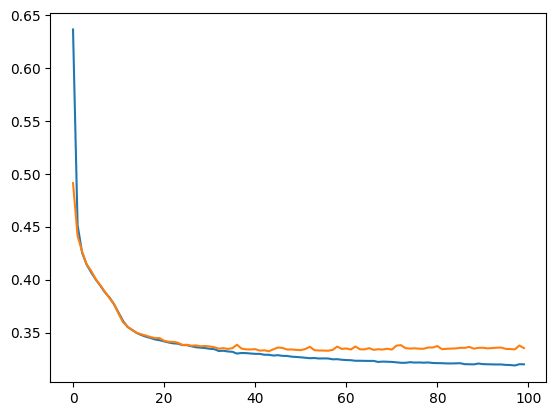

In [86]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


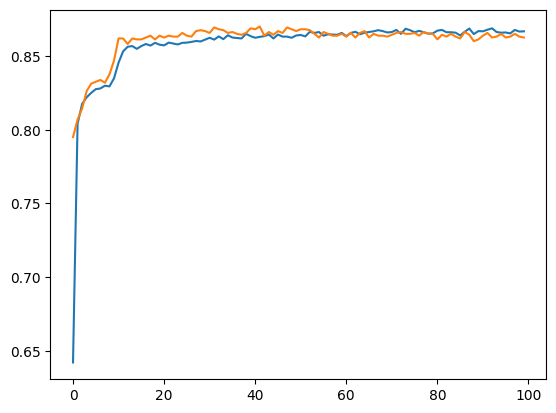

In [87]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])